<a href="https://colab.research.google.com/github/Mohammed-Abdul-Rafe-Sajid/Deep-Learning-/blob/main/LAB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow
from tensorflow import keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [26]:
X = np.array([[2,60],
              [3,65],
              [6,80],
              [7,85]], dtype=float)

y = np.array([[0],
              [0],
              [1],
              [1]], dtype=float)

In [27]:
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))

In [28]:
model.compile(optimizer=SGD(learning_rate=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
model.fit(X, y, epochs=100, verbose=0)

In [30]:
predictions = model.predict(X)
predicted_classes = (predictions > 0.5).astype(int)

print("Inputs:\n", X)
print("Predicted Outputs:\n", predictions)
print("Rounded Predictions (0/1):\n", predicted_classes)

# --------------------------------------------------------------
# 6️⃣ Show Weights and Bias
# --------------------------------------------------------------
weights, bias = model.layers[0].get_weights()
print("\nWeights:\n", weights)
print("Bias:\n", bias)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Inputs:
 [[ 2. 60.]
 [ 3. 65.]
 [ 6. 80.]
 [ 7. 85.]]
Predicted Outputs:
 [[1.]
 [1.]
 [1.]
 [1.]]
Rounded Predictions (0/1):
 [[1]
 [1]
 [1]
 [1]]

Weights:
 [[7.3500495 ]
 [0.90648293]]
Bias:
 [-0.6871713]


In [33]:
# ==============================================================
# MLP on Fashion-MNIST Dataset using TensorFlow / Keras
# ==============================================================

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# --------------------------------------------------------------
# 1️⃣ Load Dataset
# --------------------------------------------------------------
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

# --------------------------------------------------------------
# 2️⃣ Preprocess Data
# --------------------------------------------------------------
# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# --------------------------------------------------------------
# 3️⃣ Build MLP Model
# --------------------------------------------------------------
model = Sequential([
    Flatten(input_shape=(28, 28)),     # Convert 28x28 → 784
    Dense(256, activation='relu'),     # Hidden layer 1
    Dropout(0.2),                      # Prevent overfitting
    Dense(128, activation='relu'),     # Hidden layer 2
    Dense(10, activation='softmax')    # Output layer (10 classes)
])

# --------------------------------------------------------------
# 4️⃣ Compile Model
# --------------------------------------------------------------
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --------------------------------------------------------------
# 5️⃣ Train Model
# --------------------------------------------------------------
model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.1,
                    verbose=1)

# --------------------------------------------------------------
# 6️⃣ Evaluate Model
# --------------------------------------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("\n✅ Test Accuracy:", test_acc)
print("✅ Test Loss:", test_loss)

# --------------------------------------------------------------
# 7️⃣ Make Predictions
# --------------------------------------------------------------
predictions = model.predict(X_test[:5])
print("\nPredicted class probabilities (first 5 samples):\n", predictions)
print("Predicted Classes:", predictions.argmax(axis=1))

# --------------------------------------------------------------
# 8️⃣ Save Model (optional)
# --------------------------------------------------------------
model.save("fashion_mnist_mlp.h5")
print("\nModel saved as fashion_mnist_mlp.h5")

Training samples: (60000, 28, 28)
Testing samples: (10000, 28, 28)
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7414 - loss: 0.7390 - val_accuracy: 0.8450 - val_loss: 0.4177
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8501 - loss: 0.4148 - val_accuracy: 0.8648 - val_loss: 0.3669
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8694 - loss: 0.3542 - val_accuracy: 0.8727 - val_loss: 0.3486
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8719 - loss: 0.3482 - val_accuracy: 0.8777 - val_loss: 0.3372
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8824 - loss: 0.3188 - val_accuracy: 0.8720 - val_loss: 0.3346
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8829 - loss: 0.3093 - val_accuracy: 0.8803 - val_loss: 0.3184
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8935 - loss: 0.2864 - val_accuracy: 0.8843 - val_loss: 0.3126
Epoch 8/10
422/422 ━━━━━━━━━━━━


✅ Test Accuracy: 0.8812000155448914
✅ Test Loss: 0.3443051874637604
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step



Predicted class probabilities (first 5 samples):
 [[4.30027818e-08 4.10822707e-07 4.23024460e-07 4.29255664e-07
  3.57983545e-08 1.33430548e-02 3.22596890e-07 1.78867560e-02
  2.76031500e-07 9.68768239e-01]
 [1.03052992e-06 1.42249714e-14 9.98890698e-01 5.71852232e-10
  7.79827591e-04 1.45910703e-12 3.28392460e-04 4.04755067e-14
  3.29264682e-09 1.02939765e-13]
 [3.13230192e-10 1.00000000e+00 2.69366712e-12 4.37762537e-09
  2.53019220e-11 8.71752247e-18 9.73656225e-12 4.07254723e-18
  1.54922106e-14 8.60794850e-17]
 [4.88205476e-10 9.99999881e-01 1.35925507e-10 1.11706690e-07
  4.33910907e-10 6.16422933e-16 1.20430207e-10 4.91815281e-16
  1.35788990e-13 1.63614426e-14]
 [3.22198495e-02 3.25771339e-07 8.54741596e-03 2.45133735e-04
  2.65809125e-03 2.88251528e-07 9.56293464e-01 2.59008004e-07
  3.51986600e-05 7.86127785e-08]]
Predicted Classes: [9 2 1 1 6]

Model saved as fashion_mnist_mlp.h5


# 2nd experiment


In [32]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# --------------------------------------------------------------
# 1️⃣ Load Dataset
# --------------------------------------------------------------
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

# --------------------------------------------------------------
# 2️⃣ Preprocess Data
# --------------------------------------------------------------
# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# --------------------------------------------------------------
# 3️⃣ Build MLP Model
# --------------------------------------------------------------
model = Sequential([
    Flatten(input_shape=(28, 28)),     # Convert 28x28 → 784
    Dense(256, activation='relu'),     # Hidden layer 1
    Dropout(0.2),                      # Prevent overfitting
    Dense(128, activation='relu'),     # Hidden layer 2
    Dense(10, activation='softmax')    # Output layer (10 digits)
])

# --------------------------------------------------------------
# 4️⃣ Compile Model
# --------------------------------------------------------------
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# --------------------------------------------------------------
# 5️⃣ Train Model
# --------------------------------------------------------------
model.fit(X_train, y_train,
          epochs=10,
          batch_size=128,
          validation_split=0.1,
          verbose=1)

# --------------------------------------------------------------
# 6️⃣ Evaluate Model
# --------------------------------------------------------------
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("\n✅ Test Accuracy:", test_acc)
print("✅ Test Loss:", test_loss)

# --------------------------------------------------------------
# 7️⃣ Make Predictions
# --------------------------------------------------------------
predictions = model.predict(X_test[:5])
print("\nPredicted class probabilities (first 5 samples):\n", predictions)
print("Predicted Classes:", predictions.argmax(axis=1))

# --------------------------------------------------------------
# 8️⃣ Save Model (optional)
# --------------------------------------------------------------
model.save("mnist_mlp.h5")
print("\nModel saved as mnist_mlp.h5")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: (60000, 28, 28)
Testing samples: (10000, 28, 28)
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8301 - loss: 0.5746 - val_accuracy: 0.9648 - val_loss: 0.1195
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9573 - loss: 0.1431 - val_accuracy: 0.9710 - val_loss: 0.0925
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9712 - loss: 0.0954 - val_accuracy: 0.9738 - val_loss: 0.0869
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9766 - loss: 0.0744 - val_accuracy: 0.9805 - val_loss: 0.0711
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9814 - loss: 0.0601 - val_accuracy: 0.9812 - val_loss: 0.0608
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9853 - loss: 0.0482 - val_accuracy: 0.9813 - val_loss: 0.0654
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9873 - loss: 0.0391 - val_accuracy: 0.984


✅ Test Accuracy: 0.9810000061988831
✅ Test Loss: 0.06924672424793243
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step



Predicted class probabilities (first 5 samples):
 [[6.06890135e-13 4.17960511e-09 1.05211875e-07 1.61744907e-07
  1.77112750e-16 5.28632997e-12 1.19143985e-16 9.99999762e-01
  1.30385605e-10 1.82152462e-08]
 [2.17992166e-10 8.63557580e-06 9.99991417e-01 2.34219085e-11
  4.90244935e-17 3.65014408e-11 2.51251641e-11 2.47726119e-14
  1.04535748e-10 3.80707991e-17]
 [4.16520578e-08 9.99989033e-01 2.60989083e-07 1.83288034e-08
  3.20709034e-07 1.38542205e-07 1.67670620e-07 4.74482658e-06
  4.58782597e-06 6.69553231e-07]
 [9.99992967e-01 2.00159320e-08 1.34581069e-06 3.10107851e-09
  1.57049840e-09 1.08383293e-08 4.53540633e-06 1.10013377e-06
  1.51952495e-09 4.95744992e-08]
 [3.33676724e-07 2.11500750e-09 8.18290005e-07 2.12642637e-09
  9.86580491e-01 9.36486777e-10 4.07500193e-06 1.31920126e-04
  1.46286027e-07 1.32820578e-02]]
Predicted Classes: [7 2 1 0 4]

Model saved as mnist_mlp.h5


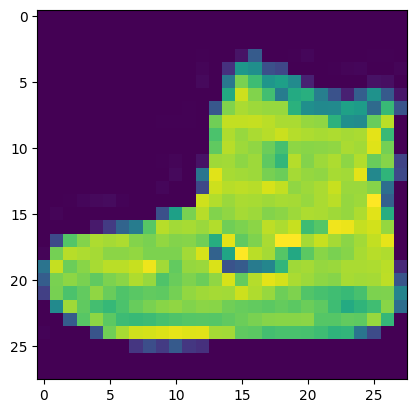

In [37]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [38]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

# --------------------------------------------------------------
# 1️⃣ Load Dataset
# --------------------------------------------------------------
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

Training samples: (60000, 28, 28)
Testing samples: (10000, 28, 28)


In [40]:
# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [42]:
model = Sequential([
    Flatten(input_shape=(28, 28)),     # Convert 28x28 → 784
    Dense(256, activation='relu'),     # Hidden layer 1
    Dropout(0.2),                      # Prevent overfitting
    Dense(128, activation='relu'),     # Hidden layer 2
    Dense(10, activation='softmax')    # Output layer (10 digits)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(metrics=['accuracy'],optimizer='Adam',loss='sparse_categorical_crossentropy')

In [62]:
history=model.fit(X_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9943 - loss: 0.0162 - val_accuracy: 0.9780 - val_loss: 0.1045
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9925 - loss: 0.0244 - val_accuracy: 0.9783 - val_loss: 0.1074
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9923 - loss: 0.0217 - val_accuracy: 0.9792 - val_loss: 0.1062
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.9928 - loss: 0.0210 - val_accuracy: 0.9811 - val_loss: 0.0989
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9938 - loss: 0.0162 - val_accuracy: 0.9799 - val_loss: 0.0953


In [ ]:
# model.fit(
#     x,                  # Training input data
#     y,                  # Training target labels
#     batch_size=32,      # Samples per gradient update
#     epochs=10,          # Number of training iterations
#     verbose=1,          # Display training progress
#     validation_split=0.2, # Fraction of training data for validation
#     validation_data=None, # Explicit validation dataset
#     shuffle=True        # Shuffle data before each epoch
# )


In [47]:
y_prob=model.predict(X_test)
y_pred=y_prob.argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9812

In [50]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [56]:
print(y_test[0])

7


Text(0.5, 0, 'epoch')

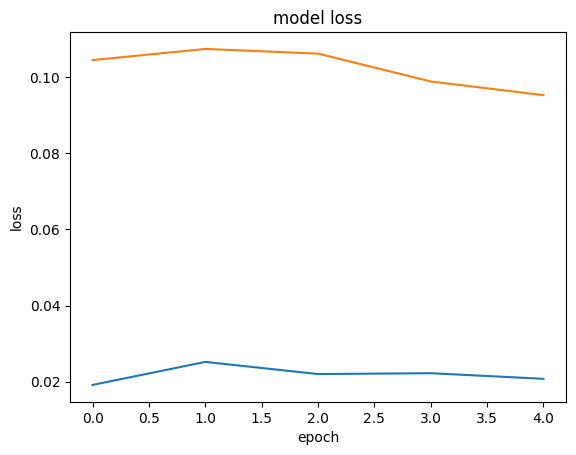

In [64]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

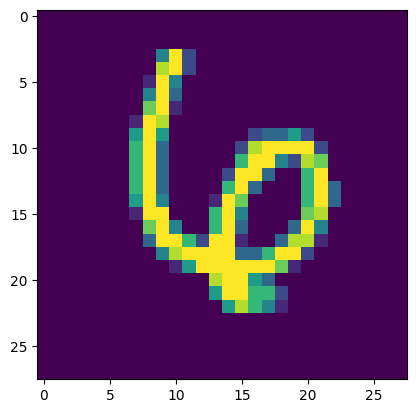

In [71]:
plt.imshow(X_test[22])


In [76]:
model.predict(X_test[22].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([6])

In [77]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# --------------------------------------------------------------
# 1️⃣ Load Dataset
# --------------------------------------------------------------
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

print("Total samples:", X.shape)

# --------------------------------------------------------------
# 2️⃣ Preprocess Data
# --------------------------------------------------------------
# Normalize pixel values (0–255 → 0–1)
X = X / 255.0

# Split dataset (train / test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature scaling (important for MLP in sklearn)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --------------------------------------------------------------
# 3️⃣ Build MLP Model
# --------------------------------------------------------------
model = MLPClassifier(
    hidden_layer_sizes=(256, 128),
    activation='relu',
    solver='adam',
    batch_size=128,
    max_iter=10,
    random_state=42,
    verbose=True
)

# --------------------------------------------------------------
# 4️⃣ Train Model
# --------------------------------------------------------------
model.fit(X_train, y_train)

# --------------------------------------------------------------
# 5️⃣ Evaluate Model
# --------------------------------------------------------------
y_pred = model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)

print("\n✅ Test Accuracy:", test_acc)

# --------------------------------------------------------------
# 6️⃣ Compute Loss (optional)
# --------------------------------------------------------------
y_prob = model.predict_proba(X_test)
test_loss = log_loss(y_test, y_prob)
print("✅ Test Loss:", test_loss)

# --------------------------------------------------------------
# 7️⃣ Make Predictions
# --------------------------------------------------------------
predictions = model.predict_proba(X_test[:5])
print("\nPredicted class probabilities (first 5 samples):\n", predictions)
print("Predicted Classes:", predictions.argmax(axis=1))


Total samples: (70000, 784)
Iteration 1, loss = 0.24301246
Iteration 2, loss = 0.08962497
Iteration 3, loss = 0.05294852
Iteration 4, loss = 0.03676368
Iteration 5, loss = 0.03088789
Iteration 6, loss = 0.02721164
Iteration 7, loss = 0.01850474
Iteration 8, loss = 0.02750199
Iteration 9, loss = 0.01415873
Iteration 10, loss = 0.01397363


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(



✅ Test Accuracy: 0.973
✅ Test Loss: 0.15416435049392954

Predicted class probabilities (first 5 samples):
 [[5.63343386e-19 2.59741570e-17 1.31075929e-12 5.32974297e-13
  3.03746691e-21 1.25189580e-13 3.60771979e-17 3.00918603e-18
  1.00000000e+00 1.98655789e-14]
 [1.65928500e-21 3.99443986e-16 1.37580257e-21 9.48035627e-21
  1.00000000e+00 1.57960937e-18 3.11106414e-23 3.29055239e-12
  3.89960597e-20 7.57426923e-12]
 [2.10086454e-09 6.22988085e-08 2.75383097e-07 4.56415865e-06
  5.10348154e-08 5.08217869e-06 3.04516375e-06 3.27470655e-08
  9.99984897e-01 1.98793869e-06]
 [6.18052194e-12 2.83777675e-11 3.66314614e-08 7.73478845e-08
  5.32614879e-20 4.59710930e-14 8.29299651e-19 9.99999884e-01
  1.29856417e-15 1.91988474e-09]
 [8.25431701e-12 5.69711239e-11 7.67713448e-12 7.15817523e-12
  1.40464887e-11 9.75711433e-12 1.99829437e-18 9.99844642e-01
  6.68995845e-11 1.55357578e-04]]
Predicted Classes: [8 4 8 7 7]
